# A/B Testing e.g.
##### [https://medium.com/hockey-stick/tl-dr-bayesian-a-b-testing-with-python-c495d375db4d]

In [1]:
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

people_in_branch = 50

# Control is Alpaca, Experiment is Bear
control, experiment = np.random.rand(2, people_in_branch)

c_successes = sum(control < 0.16)

# Bears are about 10% better relative to Alpacas
e_successes = sum(experiment < 0.176)

c_failures = people_in_branch - c_successes
e_failures = people_in_branch - e_successes

# Our Priors
prior_successes = 8
prior_failures = 42

[Text(0,0.5,'density'), Text(0.5,0,'conversion rate')]

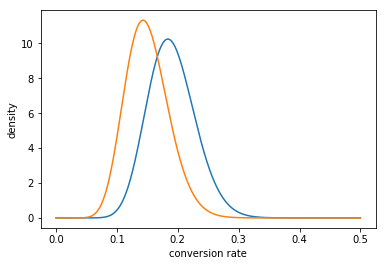

In [2]:
# For our graph
fig, ax = plt.subplots(1, 1) 

# Control
c_alpha, c_beta = c_successes + prior_successes, c_failures + prior_failures
# Experiment
e_alpha, e_beta = e_successes + prior_successes, e_failures + prior_failures

x = np.linspace(0., 0.5, 1000) 

# Generate and plot the distributions!
c_distribution = beta(c_alpha, c_beta)
e_distribution = beta(e_alpha, e_beta)

ax.plot(x, c_distribution.pdf(x))
ax.plot(x, e_distribution.pdf(x))

ax.set(xlabel='conversion rate', ylabel='density')

In [3]:
more_people_in_branch = 4000

# Control is Alpaca, Experiment is Bear
control, experiment = np.random.rand(2, more_people_in_branch)

# Add to existing data
c_successes += sum(control < 0.16)
e_successes += sum(experiment < 0.176)

c_failures += more_people_in_branch - sum(control < 0.16)
e_failures += more_people_in_branch - sum(experiment < 0.176)

[Text(0,0.5,'density'), Text(0.5,0,'conversion rate')]

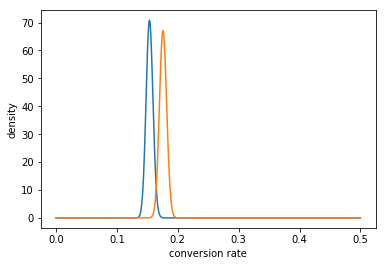

In [5]:
# For our graph
fig, ax = plt.subplots(1, 1) 

# Control
c_alpha, c_beta = c_successes + prior_successes, c_failures + prior_failures
# Experiment
e_alpha, e_beta = e_successes + prior_successes, e_failures + prior_failures

x = np.linspace(0., 0.5, 1000) 

# Generate and plot the distributions!
c_distribution = beta(c_alpha, c_beta)
e_distribution = beta(e_alpha, e_beta)

ax.plot(x, c_distribution.pdf(x))
ax.plot(x, e_distribution.pdf(x))

ax.set(xlabel='conversion rate', ylabel='density')

In [6]:
# Arguments are x values so use ppf - the inverse of cdf
print(c_distribution.ppf([0.025, 0.5, 0.975]))
print(e_distribution.ppf([0.025, 0.5, 0.975]))

[0.1427829  0.15360222 0.16485419]
[0.16435326 0.17580095 0.18765358]


In [7]:
sample_size = 100000

c_samples = pd.Series([c_distribution.rvs() for _ in range(sample_size)])
e_samples = pd.Series([e_distribution.rvs() for _ in range(sample_size)])

p_ish_value = 1.0 - sum(e_samples > c_samples)/sample_size

[Text(0,0.5,'CDF'), Text(0.5,0,'Bears / Alpacas')]

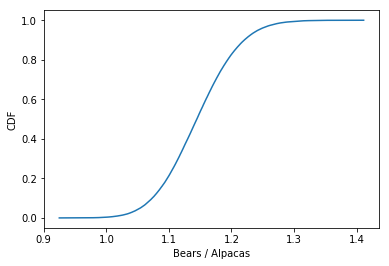

In [8]:
fig, ax = plt.subplots(1, 1)

ser = pd.Series(e_samples/c_samples)

# Make the CDF
ser = ser.sort_values()
ser[len(ser)] = ser.iloc[-1] 
cum_dist = np.linspace(0., 1., len(ser))
ser_cdf = pd.Series(cum_dist, index=ser)

ax.plot(ser_cdf)
ax.set(xlabel='Bears / Alpacas', ylabel='CDF')